In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Load the Walmart dataset (replace with actual file path)
data = pd.read_csv("Walmart.csv")

# Convert 'Date' column to datetime format with dayfirst=True to handle 'dd-mm-yyyy' format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Feature Engineering: Extract date-related features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday
data['Quarter'] = data['Date'].dt.quarter
data['DayOfMonth'] = data['Date'].dt.day

# Drop the original 'Date' column after extracting features
data.drop(columns=['Date'], inplace=True)

# Define features and target
X = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

# Define categorical and numerical columns
categorical_cols = ['Store', 'Holiday_Flag']
numerical_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Weekday', 'Quarter', 'DayOfMonth']

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Define a dictionary to store model evaluation results
model_results = {}

# Train each model, make predictions, and evaluate performance
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Store results
    model_results[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape * 100  # Convert MAPE to percentage
    }

# Convert model results to a DataFrame for easier comparison
results_df = pd.DataFrame(model_results).T
print("Model Evaluation Results:")
print(results_df)

# Select the two best models based on MAPE (lower is better)
best_models = results_df.nsmallest(2, 'MAPE')
print("\nBest Two Models Based on MAPE:")
print(best_models)

# Retrain the best two models and test them again
best_model_names = best_models.index

for model_name in best_model_names:
    model = models[model_name]
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Retrain the model on the entire training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model again
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Print the results
    print(f"\n{model_name} - Final Evaluation:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape * 100:.2f}%")


Model Evaluation Results:
                                       MAE           RMSE       MAPE
Gradient Boosting Regressor  181555.458445  223370.517037  24.730734
Random Forest Regressor       60210.690129  126998.279584   5.129068
XGBoost Regressor             50377.070457   95767.407221   4.910226
Linear Regression             94518.997000  153149.497384   9.984786

Best Two Models Based on MAPE:
                                  MAE           RMSE      MAPE
XGBoost Regressor        50377.070457   95767.407221  4.910226
Random Forest Regressor  60210.690129  126998.279584  5.129068

XGBoost Regressor - Final Evaluation:
MAE: 50377.07045700394
RMSE: 95767.40722052359
MAPE: 4.91%

Random Forest Regressor - Final Evaluation:
MAE: 60210.69012859362
RMSE: 126998.27958389104
MAPE: 5.13%


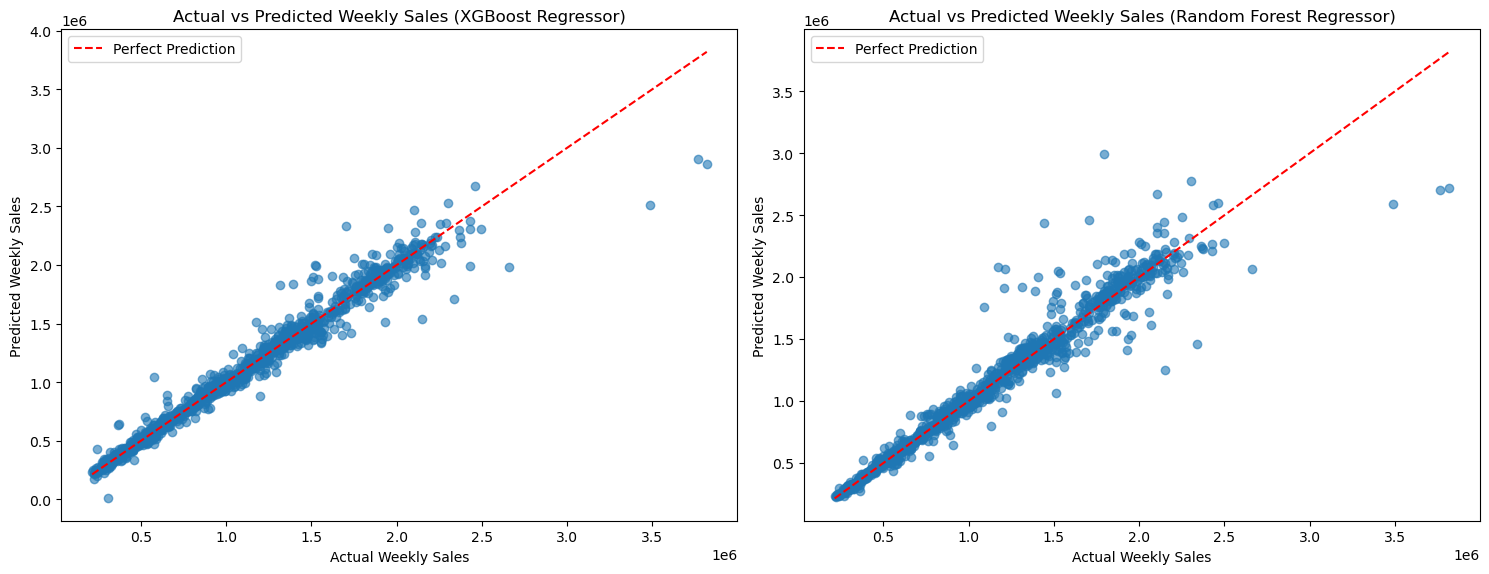

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd

# Load the Walmart dataset (replace with actual file path)
data = pd.read_csv("Walmart.csv")

# Convert 'Date' column to datetime format with dayfirst=True to handle 'dd-mm-yyyy' format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Feature Engineering: Extract date-related features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday
data['Quarter'] = data['Date'].dt.quarter
data['DayOfMonth'] = data['Date'].dt.day

# Drop the original 'Date' column after extracting features
data.drop(columns=['Date'], inplace=True)

# Define features and target
X = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

# Define categorical and numerical columns
categorical_cols = ['Store', 'Holiday_Flag']
numerical_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Weekday', 'Quarter', 'DayOfMonth']

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize both models
models = {
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Create a dictionary to store the evaluation results for both models
model_results = {}

# Train both models, make predictions, and evaluate performance
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Store the predictions for later plotting
    model_results[model_name] = {
        "y_test": y_test,
        "y_pred": y_pred
    }

# Plot Actual vs Predicted for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, (model_name, results) in enumerate(model_results.items()):
    y_test = results["y_test"]
    y_pred = results["y_pred"]
    
    ax = axes[i]
    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
    ax.set_xlabel('Actual Weekly Sales')
    ax.set_ylabel('Predicted Weekly Sales')
    ax.set_title(f'Actual vs Predicted Weekly Sales ({model_name})')
    ax.legend()

plt.tight_layout()
plt.show()


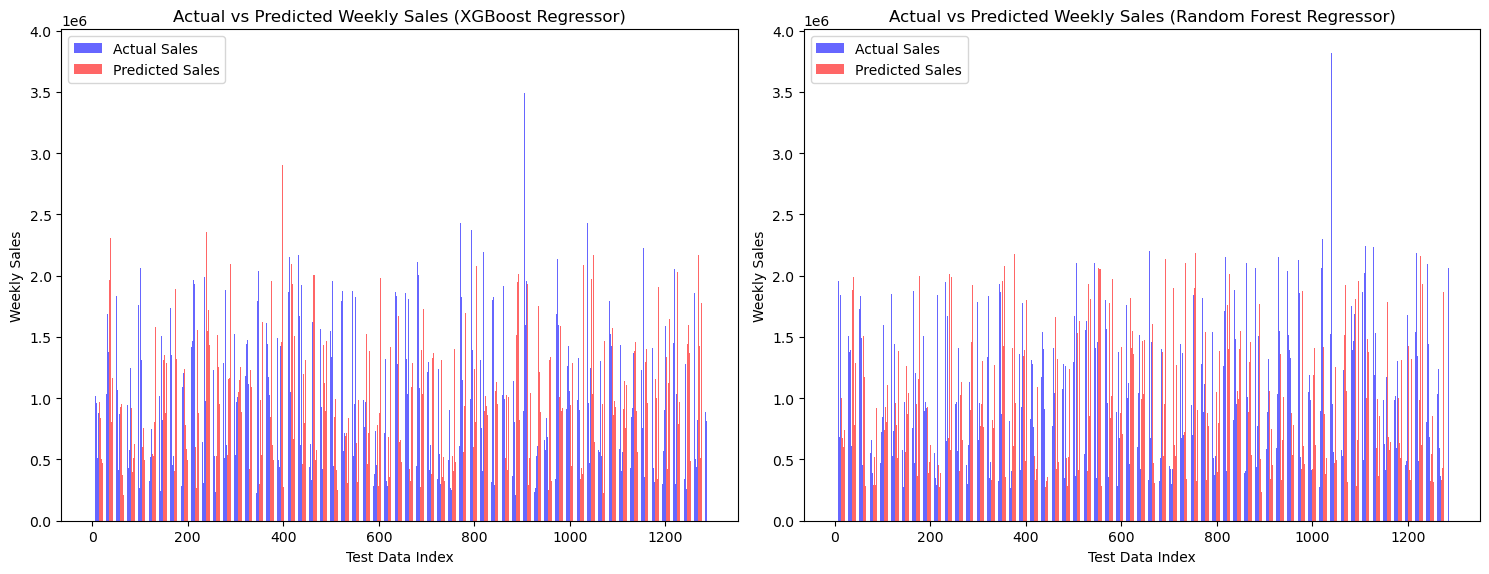

In [15]:
# Bar plot comparing Actual vs Predicted for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, (model_name, results) in enumerate(model_results.items()):
    y_test = results["y_test"]
    y_pred = results["y_pred"]
    
    ax = axes[i]
    
    # Create a bar plot for Actual vs Predicted
    index_range = range(len(y_test))
    width = 0.35  # width of the bars
    ax.bar(index_range, y_test, width, label='Actual Sales', color='blue', alpha=0.6)
    ax.bar([x + width for x in index_range], y_pred, width, label='Predicted Sales', color='red', alpha=0.6)
    
    ax.set_xlabel('Test Data Index')
    ax.set_ylabel('Weekly Sales')
    ax.set_title(f'Actual vs Predicted Weekly Sales ({model_name})')
    ax.legend()

plt.tight_layout()
plt.show()


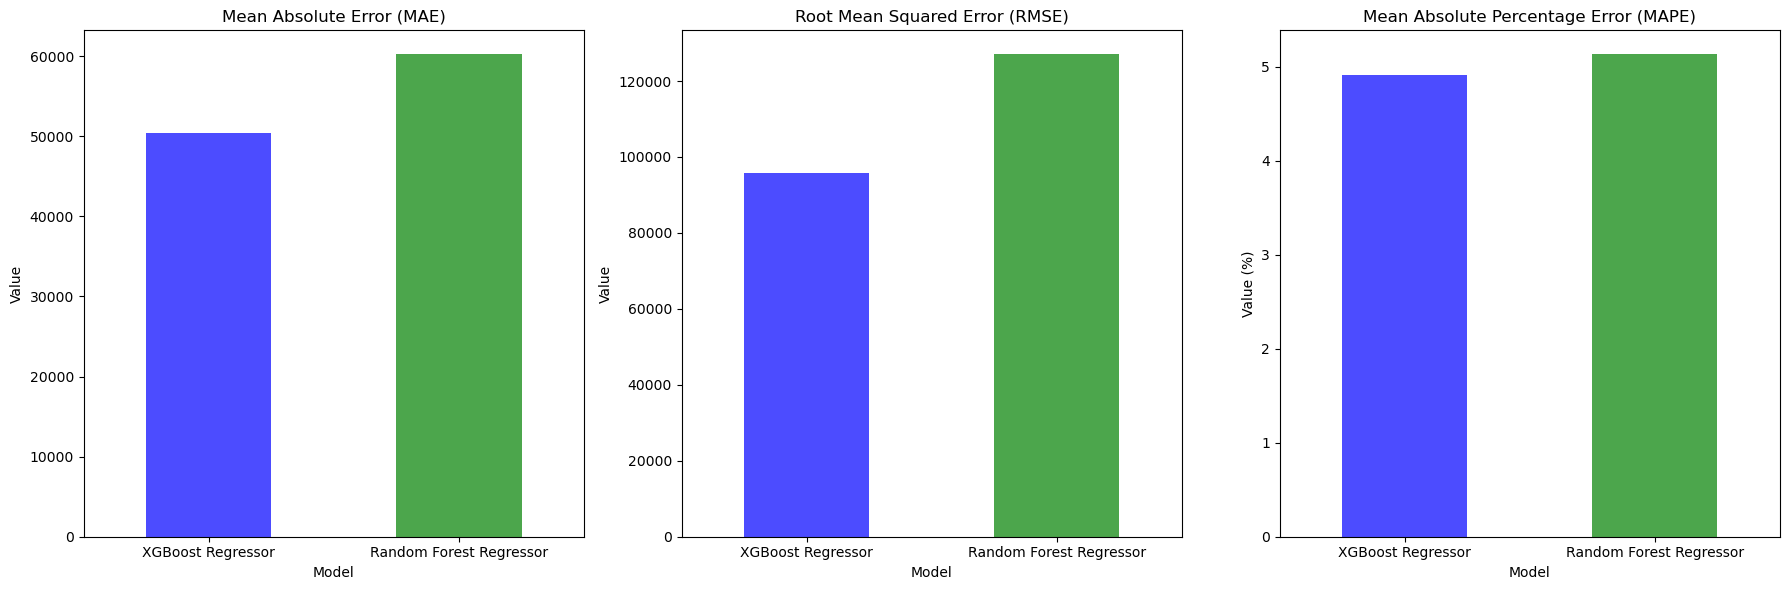

In [17]:
import matplotlib.pyplot as plt

# Extract the metrics for the best two models
best_models_metrics = best_models[['MAE', 'RMSE', 'MAPE']]

# Plotting the evaluation metrics for the best two models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE Plot
best_models_metrics['MAE'].plot(kind='bar', color=['blue', 'green'], ax=axes[0], alpha=0.7)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('Model')
axes[0].set_xticklabels(best_models_metrics.index, rotation=0)

# RMSE Plot
best_models_metrics['RMSE'].plot(kind='bar', color=['blue', 'green'], ax=axes[1], alpha=0.7)
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('Value')
axes[1].set_xlabel('Model')
axes[1].set_xticklabels(best_models_metrics.index, rotation=0)

# MAPE Plot
best_models_metrics['MAPE'].plot(kind='bar', color=['blue', 'green'], ax=axes[2], alpha=0.7)
axes[2].set_title('Mean Absolute Percentage Error (MAPE)')
axes[2].set_ylabel('Value (%)')
axes[2].set_xlabel('Model')
axes[2].set_xticklabels(best_models_metrics.index, rotation=0)

plt.tight_layout()
plt.show()



XGBoost Regressor - Testing Results:
MAE: 50377.07045700394
RMSE: 95767.40722052359
MAPE: 4.91%


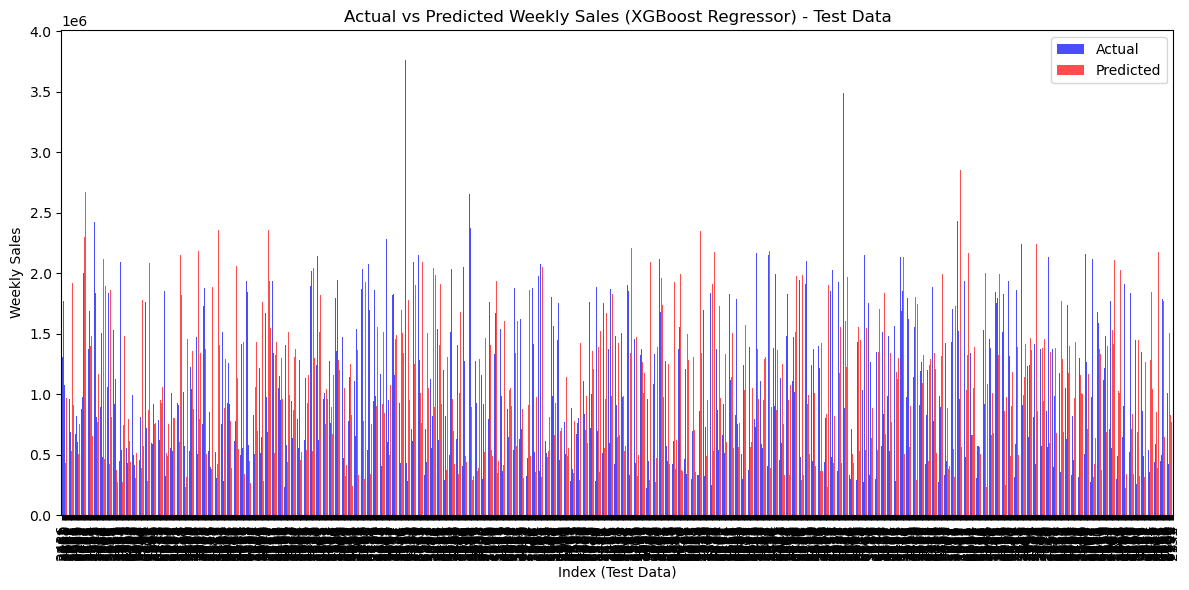


Random Forest Regressor - Testing Results:
MAE: 60210.69012859362
RMSE: 126998.27958389104
MAPE: 5.13%


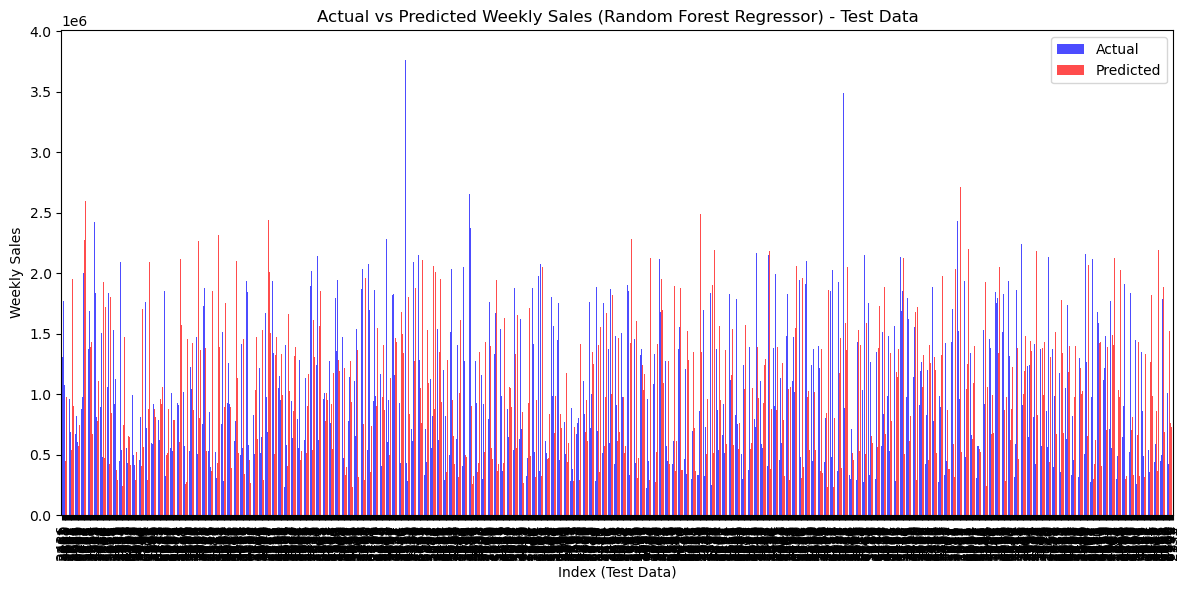

In [21]:
# Retrain the best two models and test them on unseen data (X_test, y_test)
for model_name in best_model_names:
    model = models[model_name]
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Retrain the model on the entire training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model again
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Print the results for testing
    print(f"\n{model_name} - Testing Results:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape * 100:.2f}%")
    
    # Visualize Actual vs Predicted for better comparison using a bar plot
    comparison_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })

    # Plotting the bar plot for Actual vs Predicted
    comparison_df.plot(kind='bar', figsize=(12, 6), color=['blue', 'red'], width=0.8, alpha=0.7)

    # Customizing the plot
    plt.title(f'Actual vs Predicted Weekly Sales ({model_name}) - Test Data')
    plt.xlabel('Index (Test Data)')
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.legend(["Actual", "Predicted"])

    plt.tight_layout()  # Adjust layout
    plt.show()


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline

# Hyperparameter tuning for Random Forest Regressor (Reduced grid size)
param_dist_rf = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__bootstrap': [True, False]
}

# Create the pipeline for Random Forest Regressor
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Set up RandomizedSearchCV with 3-fold cross-validation and fewer iterations
random_search_rf = RandomizedSearchCV(estimator=pipeline_rf, param_distributions=param_dist_rf, 
                                      n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search
random_search_rf.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for Random Forest Regressor:", random_search_rf.best_params_)
print("Best cross-validation score:", random_search_rf.best_score_)

# Retrieve the best model from the randomized search
best_rf_model = random_search_rf.best_estimator_

# Evaluate the best model
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f"\nRandom Forest Regressor - Tuning Results:")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"MAPE: {mape_rf * 100:.2f}%")

# Hyperparameter tuning for XGBoost Regressor (Reduced grid size)
param_dist_xgb = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 6, 10],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# Create the pipeline for XGBoost Regressor
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(random_state=42))
])

# Set up RandomizedSearchCV with 3-fold cross-validation and fewer iterations
random_search_xgb = RandomizedSearchCV(estimator=pipeline_xgb, param_distributions=param_dist_xgb, 
                                       n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search
random_search_xgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for XGBoost Regressor:", random_search_xgb.best_params_)
print("Best cross-validation score:", random_search_xgb.best_score_)

# Retrieve the best model from the randomized search
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate the best model
y_pred_xgb = best_xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"\nXGBoost Regressor - Tuning Results:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"MAPE: {mape_xgb * 100:.2f}%")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Random Forest Regressor: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': None, 'regressor__bootstrap': True}
Best cross-validation score: 0.9474842786452294

Random Forest Regressor - Tuning Results:
MAE: 60592.32772258614
RMSE: 128097.91803226189
MAPE: 5.19%
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for XGBoost Regressor: {'regressor__subsample': 0.8, 'regressor__n_estimators': 150, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.8}
Best cross-validation score: 0.9697394666802253

XGBoost Regressor - Tuning Results:
MAE: 48602.29548708237
RMSE: 90487.42430506929
MAPE: 4.66%


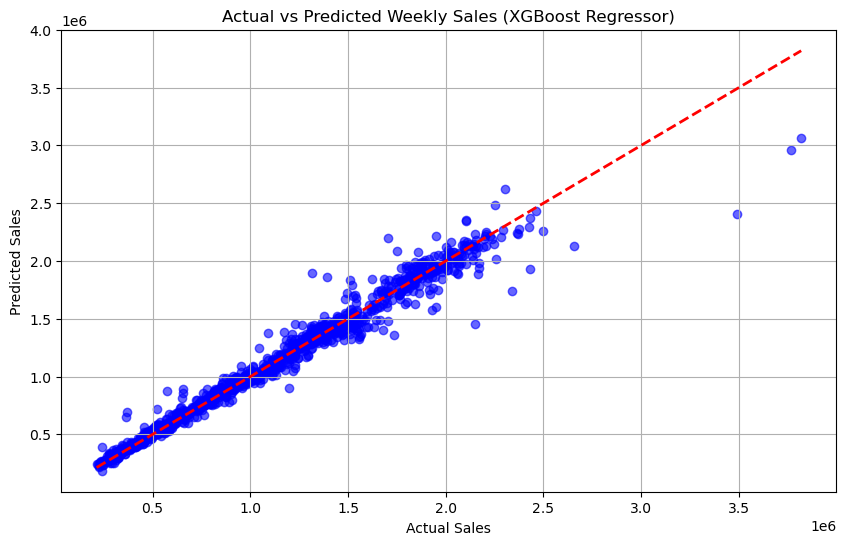

In [33]:
import matplotlib.pyplot as plt

# Get the actual vs predicted values for XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)

# Plot Actual vs Predicted for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Weekly Sales (XGBoost Regressor)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()


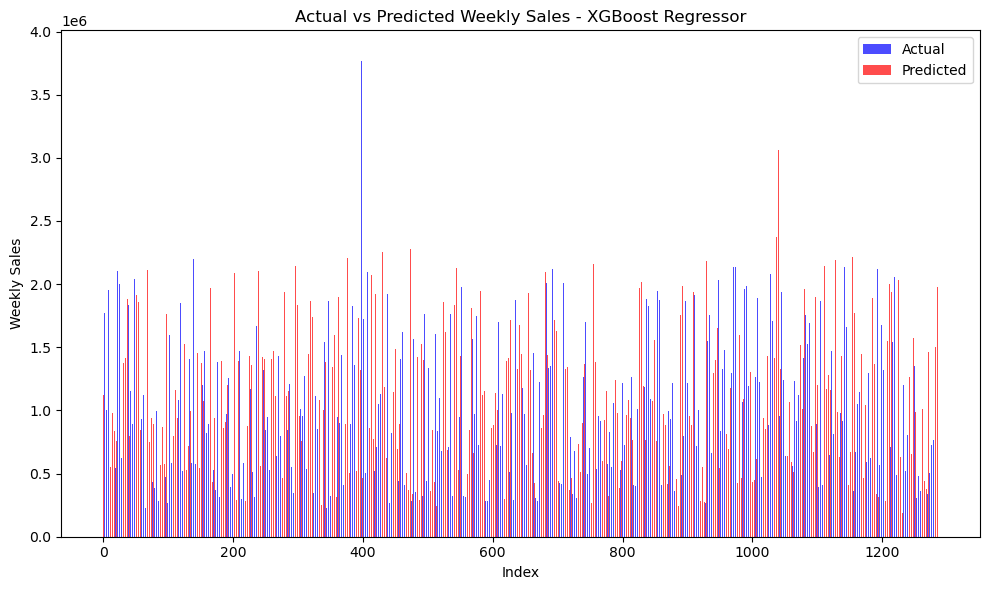

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Get actual vs predicted values
y_pred_xgb = best_xgb_model.predict(X_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb
})

# Set the width of the bars
width = 0.3

# Create an index for the x-axis
indices = np.arange(len(comparison_df))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(indices - width / 2, comparison_df['Actual'], width, label='Actual', alpha=0.7, color='blue')
plt.bar(indices + width / 2, comparison_df['Predicted'], width, label='Predicted', alpha=0.7, color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales - XGBoost Regressor')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
import joblib

# Save the best XGBoost model to a file
joblib.dump(best_xgb_model, 'xgboost_best_model.pkl')

print("XGBoost model has been saved successfully!")


XGBoost model has been saved successfully!
